# Does Healthy Diet Help Prevent COVID-19?  

Group Name: Fight on Healthy diet  
Name: Sijing Liu  
Email: sijingli@usc.edu  
Batch code: LISUM13: 30  
Country: U.S.  
College: University of Southern California  
Specialization: Data Science  

# Main objective   
To answer the following questions: 
- Are countries with healthier eating habits less impacted by COVID-19?  
- Does a healthy diet ultimately help prevent COVID-19?   

GitHub Repo link: https://github.com/Sijing98/Internship22Fall/tree/main/Project%20-%20Fight%20on%20Healthy%20diet

===========================================================  
<b>Food categories</b>
(as I defined according to academic references)  

<b>Healthy</b> diet  
- Aquatic Products, Other + Offals + Fish, Seafood
- Cereals - Excluding Beer
- Eggs + Milk - Excluding Butter
- Fruits - Excluding wine
- Pulses
- Starchy Roots
- Treenuts
- Vegetables + Vegetal Products  

<b>Unhealthy</b> diet  
- Animal fats + Animal Products + Meat
- Oilcrops + Vegetable Oils
- Sugar & Sweeteners + Sugar Crops  

===========================================================  

In [8]:
import numpy as np
import numpy as em
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set_palette("Set2")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [9]:
intake = pd.read_csv("../Intership22Fall/1_for_use_Food_intake.csv")
intake.head()

,Country,"Aquatic Products, Other + Offals + Fish, Seafood",Cereals - Excluding Beer,Eggs + Milk - Excluding Butter,Fruits - Excluding Wine,Pulses,Starchy Roots,Treenuts,Vegetables + Vegetal Products,Animal fats + Animal Products + Meat,Oilcrops + Vegetable Oils,Sugar & Sweeteners + Sugar Crops,Obesity,Undernourished,Confirmed,Deaths,Confirmed (%),Deaths (%),Population
0,Afghanistan,0.2407,24.8097,7.7927,5.3495,0.2953,0.8802,0.0770,47.3287,10.8334,0.6045,1.3489,4.5,29.8,156210,7272,0.004,0.000,38928000
1,Albania,0.4450,5.7817,16.3028,6.7861,0.2380,1.8096,0.1515,43.0057,20.7886,1.2638,1.5367,22.3,6.2,184887,2916,0.065,0.001,2838000
2,Algeria,0.3286,13.6816,8.1466,6.3801,0.4783,4.1340,0.1152,52.0135,10.7921,1.3803,1.8342,26.6,3.9,206358,5918,0.005,0.000,44357000
3,Angola,1.9257,9.1085,0.8898,6.0005,0.6507,18.1102,0.0061,47.3763,7.0409,1.0649,1.8495,6.8,25.0,64374,1708,0.002,0.000,32522000
4,Argentina,0.8472,8.4102,11.2307,6.0435,0.0528,3.0420,0.0200,35.0062,26.6109,0.9657,3.0536,28.5,4.6,5288259,115942,0.117,0.003,45377000


In [10]:
intake.describe()

,"Aquatic Products, Other + Offals + Fish, Seafood",Cereals - Excluding Beer,Eggs + Milk - Excluding Butter,Fruits - Excluding Wine,Pulses,Starchy Roots,Treenuts,Vegetables + Vegetal Products,Animal fats + Animal Products + Meat,Oilcrops + Vegetable Oils,Sugar & Sweeteners + Sugar Crops,Obesity,Undernourished,Confirmed,Deaths,Confirmed (%),Deaths (%),Population
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,1.530000e+02
mean,1.485862,12.126960,7.292746,5.505375,0.565020,5.336005,0.123241,43.796318,15.712421,1.445395,2.867141,18.247059,11.221569,1.538362e+06,30902.006536,0.052412,0.000856,4.804658e+07
std,1.215787,5.928935,5.182477,3.142960,0.619181,5.570936,0.149481,6.676394,7.324163,1.188277,1.489577,9.417048,11.911941,5.058239e+06,92183.424743,0.049409,0.001041,1.641521e+08
min,0.199000,3.401400,0.142000,0.659600,0.001000,0.679600,0.000000,26.945700,2.321700,0.210000,0.366600,2.100000,2.000000,3.712000e+03,28.000000,0.000000,0.000000,7.200000e+04
25%,0.722600,7.298200,2.600500,3.506100,0.147200,1.997500,0.023000,39.389000,10.105900,0.824600,1.774400,8.200000,2.000000,5.214100e+04,913.000000,0.006000,0.000000,4.020000e+06
50%,1.157200,10.536500,6.460100,4.923000,0.330600,3.111300,0.084100,45.151700,16.014800,1.236900,2.611000,21.300000,7.000000,3.042410e+05,4675.000000,0.042000,0.001000,1.071600e+07
75%,1.853700,16.146500,11.473000,6.786100,0.795500,5.502200,0.151500,48.492400,21.504400,1.729500,3.829700,25.700000,15.200000,9.156030e+05,18268.000000,0.087000,0.001000,3.504100e+07
max,8.804600,29.804500,21.235700,19.302800,3.483800,27.712800,0.756900,57.982600,34.367900,10.767000,9.725900,37.300000,59.600000,4.595319e+07,745668.000000,0.231000,0.006000,1.402385e+09


# 1 General distribution

## 1.1 Food Consumption Distribution 

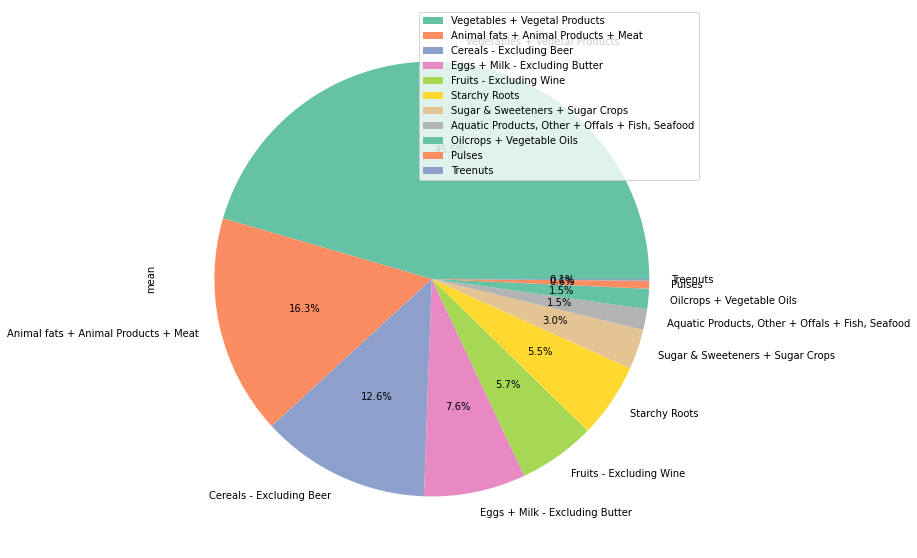

In [11]:
food_mean = intake.describe().iloc[1]
food_mean = pd.DataFrame(food_mean).drop(['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Confirmed (%)', 'Deaths (%)', 'Population'], axis=0)
food_mean = food_mean.sort_values(by='mean', ascending=False)
food_mean_plot = food_mean.plot.pie(subplots=True, figsize=(14, 10),autopct='%1.1f%%')

As the figure shown belown, <b>Vegetables + Vegetal Products</b> (45.5%), which are categorized as healthy food are the most consumed by people worldwidely, followed by <b>Animal fats + Animal Products + Meat</b> (16.3%) and <b>Cereals - Excluding Beer</b> (12.6%).

## 1.2  Malnutrition Rate

Malnutrition occurs when the body doesn't get enough or balanced nutrients(WHO, 2020).  
It covers 2 broad groups of conditions: undernutrition and obesity. The world average malnutrition rate is:  
- Obesity: 18%  
- Undernourished: 11%  
  
(as shown in intake.describe() - mean row)

## 1.3 COVID-19 Case Rate

In [12]:
fig = px.bar(intake, x = "Country", y ="Confirmed").update_xaxes(categoryorder="total descending")
fig.show()

In [13]:
fig = px.bar(intake, x = "Country", y ="Deaths").update_xaxes(categoryorder="total descending")
fig.show()

<b>The United States of America</b> has the most confirmed and deaths cases. 

To better describe COVID-19 cases rate, we combine the diagnosed cases and the death using concept of <b>Case fatality rate (CFR)</b>:  
- CRF = Number of Deaths / Number of Confirmed Cases (Ritchie et al., 2020)  

We calculate the CRF of all countries, which are presented below. In the following analysis, we also use CRF besides COVID-19 case rate.

In [14]:
intake['CRF'] = intake['Deaths']/intake['Confirmed']
intake['CRF']

0      0.046553
1      0.015772
2      0.028678
3      0.026532
4      0.021924
         ...   
148    0.012022
149    0.024061
150    0.192249
151    0.017456
152    0.035170
Name: CRF, Length: 153, dtype: float64

In [15]:
fig = px.bar(intake, x = "Country", y ="CRF").update_xaxes(categoryorder="total descending")
fig.show()

We consider the CRF of <b>Yemen</b> (19.22%) as an <b>outlier</b> and remove it in the following association analysis.

# 2 Association Detection

## 2.1 Food consumption & COVID-19 cases

(array([0.5]), [Text(0.5, 0, 'Deaths')])

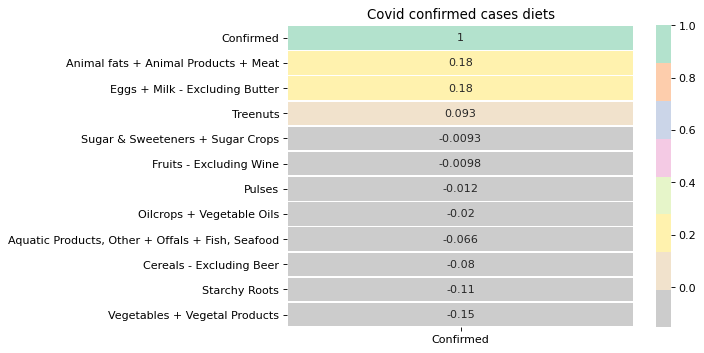

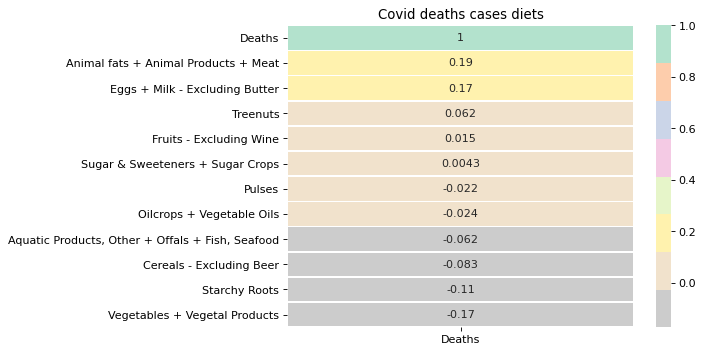

In [16]:
corr_fig = intake[['Confirmed','Animal fats + Animal Products + Meat', 'Aquatic Products, Other + Offals + Fish, Seafood', 'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter', 'Fruits - Excluding Wine', 'Oilcrops + Vegetable Oils', 'Pulses', 'Starchy Roots', 'Sugar & Sweeteners + Sugar Crops', 'Treenuts', 'Vegetables + Vegetal Products']]
x = corr_fig.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Confirmed']].sort_values(by=['Confirmed'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid confirmed cases diets')
plt.xticks()

corr_fig = intake[['Deaths','Animal fats + Animal Products + Meat', 'Aquatic Products, Other + Offals + Fish, Seafood', 'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter', 'Fruits - Excluding Wine', 'Oilcrops + Vegetable Oils', 'Pulses', 'Starchy Roots', 'Sugar & Sweeteners + Sugar Crops', 'Treenuts', 'Vegetables + Vegetal Products']]
x = corr_fig.corr(method='pearson')
plt.figure(figsize=(7,5), dpi= 80)
sns.heatmap(x[['Deaths']].sort_values(by=['Deaths'],ascending=False),cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Covid deaths cases diets')
plt.xticks()

Generally, the relationship between food consumption and countries' confirmed cases and food consumption and deaths cases are very similar.  
The top 1 correlations is <b>Animal fats + Animal Products + Meat</b>.

## 2.2 Food consumption & Malnutrition

In [17]:
intake[intake.Obesity < intake['Obesity'].mean()].shape

(62, 20)

In [18]:
intake[intake.Obesity > intake['Obesity'].mean()].shape

(91, 20)

Take the average obesity rate as a boundary, we divide the world into <b>HOC</b> (High Obesity Countries) and <b>LOC</b> (Low Obesity Countries). 

In [19]:
high_obesity = intake[intake.Obesity > intake['Obesity'].mean()]
low_obesity = intake[intake.Obesity <= intake['Obesity'].mean()]
intake['ObesityAboveAverage'] = (intake["Obesity"] > intake['Obesity'].mean()).astype(int)
intake['ObesityAboveAverage']

0      0
1      1
2      1
3      0
4      1
      ..
148    1
149    0
150    0
151    0
152    0
Name: ObesityAboveAverage, Length: 153, dtype: int32

We start by exploring the most decisive food types: <b>Animal fats + Animal Products + Meat</b>. Research shows they may cause obesity.

In [20]:
fig = px.histogram(intake, x = "Animal fats + Animal Products + Meat", nbins=50, color = "ObesityAboveAverage", marginal="rug")

fig.add_shape(
            type = "line",
            x0 = high_obesity['Animal fats + Animal Products + Meat'].median(),
            y0 = 0,
            x1 = high_obesity['Animal fats + Animal Products + Meat'].median(),
            y1 = 12,
            line = dict(color="crimson", width=4),
    )

fig.add_shape(
            type = "line",
            x0 = low_obesity['Animal fats + Animal Products + Meat'].median(),
            y0 = 0,
            x1 = low_obesity['Animal fats + Animal Products + Meat'].median(),
            y1 = 12,
            line = dict(color="darkblue", width=4),
    )

fig.show()

In [21]:
fig = px.histogram(intake, x = "Vegetables + Vegetal Products", nbins=50, color = "ObesityAboveAverage", marginal="rug")

fig.add_shape(
            type = "line",
            x0 = high_obesity['Vegetables + Vegetal Products'].median(),
            y0 = 0,
            x1 = high_obesity['Vegetables + Vegetal Products'].median(),
            y1 = 12,
            line = dict(color="crimson", width=4),
    )

fig.add_shape(
            type = "line",
            x0 = low_obesity['Vegetables + Vegetal Products'].median(),
            y0 = 0,
            x1 = low_obesity['Vegetables + Vegetal Products'].median(),
            y1 = 12,
            line = dict(color="darkblue", width=4),
    )

fig.show()

HOC have a higher consumption of <b>Animal fats + Animal Products + Meat</b> (belongs to unhealthy diet) and lower consumption of <b>Vegetables + Vegetal Products</b> (belongs to healthy diet).

## 2.3 Obesity & COVID-19

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Confirmed (%)'),
  Text(1.5, 0, 'Deaths (%)'),
  Text(2.5, 0, 'Undernourished'),
  Text(3.5, 0, 'Obesity')])

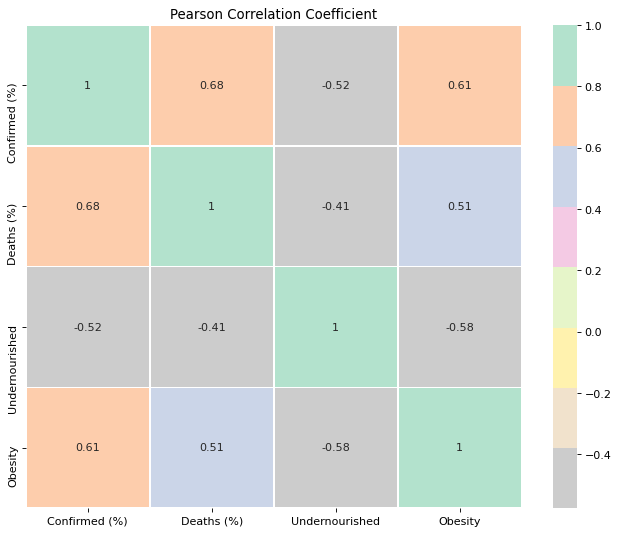

In [22]:
corr_map = intake[['Confirmed (%)', 'Deaths (%)', 'Undernourished', 'Obesity']]
x = corr_map.corr(method='pearson')
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(x,cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Pearson Correlation Coefficient')
plt.xticks()

<b>obesity</b> has a stronger correlation (positive) with COVID-19 Confirmed/ Deaths than undernourished

In [23]:
fig = px.bar(intake, x = "Country", y ="Deaths", facet_col = "ObesityAboveAverage")
fig.update_xaxes(matches=None,categoryorder="total descending")
fig.show()

HOC have more COVID-19 deaths cases

In [24]:
fig = px.scatter(intake[intake.Country != 'Yemen'], x="Deaths", y = "Obesity", size = "CRF",
                 hover_name='Country', log_x=False, size_max=30, template="simple_white")

fig.add_shape(
            type = "line",
            x0 = 0,
            y0 = intake[intake.Country != 'Yemen']['Obesity'].mean(),
            x1 = intake[intake.Country != 'Yemen']['Deaths'].max(),
            y1 = intake[intake.Country != 'Yemen']['Obesity'].mean(),
            line = dict(color="crimson", width=4),
    )

fig.show()

HOC have higher CRF.  
The red line represents the average obesity rate among countries. The size of the points corresponds to the country's COVID-19 CRF.

# 3 Modelling

In [25]:
healthy_features = ['Aquatic Products, Other + Offals + Fish, Seafood', 'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter',
                    'Fruits - Excluding Wine', 'Pulses', 'Starchy Roots', 'Treenuts', 'Vegetables + Vegetal Products']
unhealthy_features = ['Animal fats + Animal Products + Meat', 'Oilcrops + Vegetable Oils', 'Sugar & Sweeteners + Sugar Crops']

In [26]:
intake['Healthy diet'] = intake[healthy_features].sum(axis=1)
intake['Unhealthy diet'] = intake[unhealthy_features].sum(axis=1)

In [27]:
intake.columns

Index(['Country', 'Aquatic Products, Other + Offals + Fish, Seafood',
       'Cereals - Excluding Beer', 'Eggs + Milk - Excluding Butter',
       'Fruits - Excluding Wine', 'Pulses', 'Starchy Roots', 'Treenuts',
       'Vegetables + Vegetal Products', 'Animal fats + Animal Products + Meat',
       'Oilcrops + Vegetable Oils', 'Sugar & Sweeteners + Sugar Crops',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Confirmed (%)',
       'Deaths (%)', 'Population', 'CRF', 'ObesityAboveAverage',
       'Healthy diet', 'Unhealthy diet'],
      dtype='object')

## 3.1 Regressor: Food consumption/ obesity → CRF

In [28]:
#intake_CRF = intake[intake.Country != 'Yemen'][healthy_features + ['Healthy diet'] + unhealthy_features + ['Unhealthy diet'] + ['Obesity','CRF']]
intake_CRF = intake[intake.Country != 'Yemen'][['Healthy diet','Unhealthy diet','Obesity','CRF']]
intake_CRF = shuffle(intake_CRF)

CRF_features = intake_CRF.columns.drop('CRF')
CRF_target = 'CRF'

print('Model features: ', CRF_features)
print('Model target: ', CRF_target)

X = intake_CRF[CRF_features]
y = intake_CRF[CRF_target]

Model features:  Index(['Healthy diet', 'Unhealthy diet', 'Obesity'], dtype='object')
Model target:  CRF


### Train-test split

In [29]:
train_data, test_data = train_test_split(intake_CRF, test_size = 0.2, shuffle = True, random_state = 28)

In [30]:
X_train = train_data[CRF_features]
y_train = train_data[CRF_target]
X_test = test_data[CRF_features]
y_test = test_data[CRF_target]

regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge(random_state=28))
])

In [31]:
# Training
regressor.fit(X_train, y_train)

# Scoring the training set
train_preds = regressor.predict(X_train)
regressor.score(X_train, y_train)

0.023620247170878517

In [32]:
# Cross validate (cv = 10)
cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)
print(cv_score)
print(cv_score.mean())

[-0.22484198  0.0236341  -0.24485741 -1.12920429  0.0302233  -0.19338225
  0.03265793 -0.29109835 -0.13250643 -0.26696342]
-0.2396338809237876


the result of cross validation looks bad, let's create function to evaluate model on a few different scores (MAE, MSE, R^2)

In [33]:
def show_scores(model, X_train, X_test, y_train, y_test):    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Test MAE': mean_absolute_error(y_test, test_preds),
              'Training MSE': mean_squared_error(y_train, train_preds),
              'Test MSE': mean_squared_error(y_test, test_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Test R^2': r2_score(y_test, test_preds)}
    return scores

show_scores(regressor, X_train, X_test , y_train, y_test)

{'Training MAE': 0.010139288551465349,
 'Test MAE': 0.008976086451036754,
 'Training MSE': 0.00021034639160901633,
 'Test MSE': 0.00012536586262238284,
 'Training R^2': 0.023620247170878517,
 'Test R^2': -0.015314855767970093}

try to visualize our model's prediction using 'unhealthy diet'

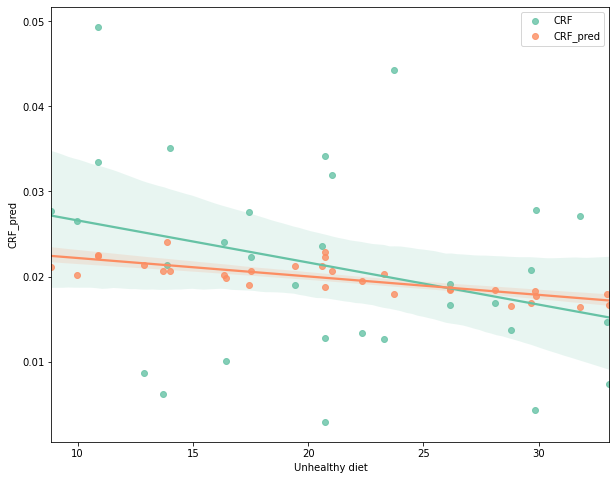

In [34]:
test_plot = X_test.copy()
test_plot['CRF'] = y_test
test_plot['CRF_pred'] = regressor.predict(X_test)

fig, ax = plt.subplots(figsize=[10,8])

sns.regplot(x = 'Unhealthy diet', y = 'CRF', data = test_plot, ax = ax, label='CRF')
sns.regplot(x = 'Unhealthy diet', y = 'CRF_pred', data = test_plot, ax = ax, label='CRF_pred')

plt.legend()

Our <b>Ridge regressor</b> fails to make a good prediction but it somehow captures the <b>tendency</b> of our target.

### Imporve by comparing other models (<b>SVG, Random Forest, XGBoost</b>).

In [35]:
models = {'Ridge':Ridge(random_state=28),
          'SVR':SVR(),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

# build the function that tests each model
def model_build(model, X_train, y_train, X_test, y_test, scale=True):
    if scale:
        regressor = Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', model)
        ])
    
    else:
        regressor = Pipeline([
            ('estimator', model)
        ])

    # Training
    regressor.fit(X_train, y_train)

    # Scoring the training set
    train_preds = regressor.predict(X_train)
    print(f"R2 on single split: {regressor.score(X_train, y_train)}")

    # Cross validate (cv = 10)
    cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)

    print(f"Cross validate R2 score: {cv_score.mean()}")

    # Scoring the test set
    for k, v in show_scores(regressor, X_train, X_test , y_train, y_test).items():
        print("     ", k, v)

In [36]:
for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()

==== Scoring Ridge model====
R2 on single split: 0.023620247170878517
Cross validate R2 score: -0.2396338809237876
      Training MAE 0.010139288551465349
      Test MAE 0.008976086451036754
      Training MSE 0.00021034639160901633
      Test MSE 0.00012536586262238284
      Training R^2 0.023620247170878517
      Test R^2 -0.015314855767970093

==== Scoring SVR model====
R2 on single split: -3.1675654513290423
Cross validate R2 score: -8.19459360063669
      Training MAE 0.028313300650584603
      Test MAE 0.025329530532984104
      Training MSE 0.0008978395464893332
      Test MSE 0.0007549279739395947
      Training R^2 -3.1675654513290423
      Test R^2 -5.114021560115172

==== Scoring RandomForest model====
R2 on single split: 0.8457297486311357
Cross validate R2 score: -0.47666648868965844
      Training MAE 0.004162149215989866
      Test MAE 0.009369563193577858
      Training MSE 3.323521469390374e-05
      Test MSE 0.00013960157215575276
      Training R^2 0.8457297486311357

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



R2 on single split: 0.9889903883928413


C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pa

Cross validate R2 score: -0.5990304229723904
      Training MAE 0.0011534352388208758
      Test MAE 0.011016226092553543
      Training MSE 2.3718558971264198e-06
      Test MSE 0.0001854421024535424
      Training R^2 0.9889903883928413
      Test R^2 -0.5018611731094302



C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



<b>XGBoost model</b> shows the best perfromance.  
Let's try some hyperparameter tunning with a simple GridSearch:

In [37]:
xgb = XGBRegressor()

parameters = {'nthread':[4],
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}

xgb_best = XGBRegressor(colsample_bytree = 0.7,
                        learning_rate = 0.05,
                        max_depth = 6,
                        min_child_weight = 4,
                        n_estimators = 500,
                        nthread = 4,
                        objective = 'reg:squarederror',
                        subsample = 0.7)

model_build(xgb_best, X_train, y_train, X_test, y_test, scale=False)

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



R2 on single split: 0.9887577147744093


C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pa

Cross validate R2 score: -0.6652646198247243
      Training MAE 0.001111790832666746
      Test MAE 0.011485067706937031
      Training MSE 2.421981942774093e-06
      Test MSE 0.0001954013992316798
      Training R^2 0.9887577147744093
      Test R^2 -0.5825196694522743


C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [38]:
def plotTest(col, target, data):
    fig, ax = plt.subplots(figsize=[10,8])

    sns.regplot(x = col, y = target, data = data, ax = ax, label=target)
    sns.regplot(x = col, y = target+'_pred', data = data, ax = ax, label=target+'_pred')

    plt.legend()

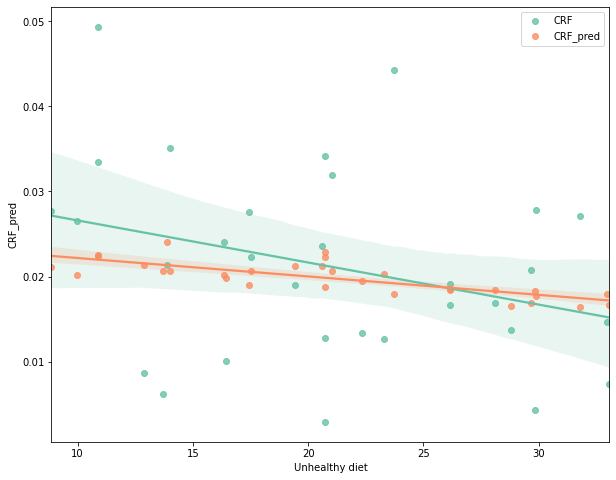

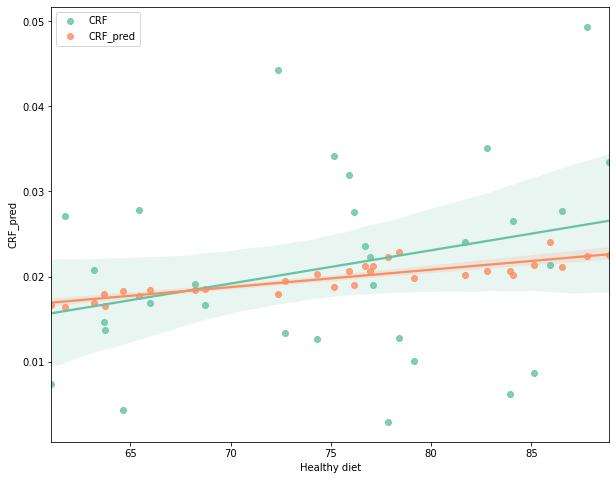

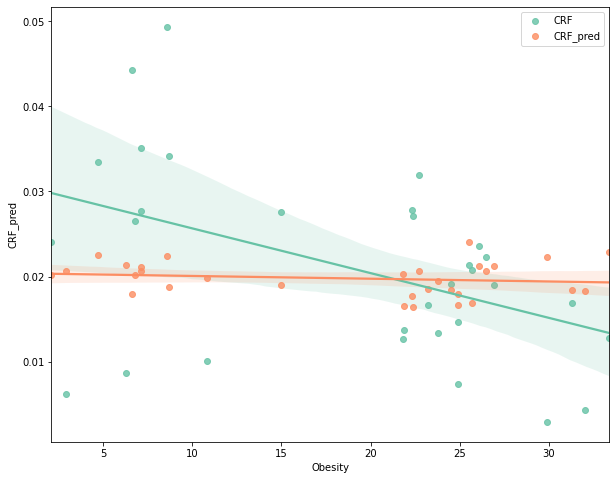

In [39]:
plotTest('Unhealthy diet', 'CRF', test_plot)
plotTest('Healthy diet', 'CRF', test_plot)
plotTest('Obesity', 'CRF', test_plot)

We can see <b>obesity → CRF</b> performs better than <b>Food consumption → CRF</b>

## 3.2 Regressor: Food consumption → obesity

In [40]:
intake_obesity = intake[intake.Country != 'Yemen'][['Healthy diet','Unhealthy diet','Obesity']]
intake_obesity = shuffle(intake_obesity)

obesity_features = intake_obesity.columns.drop('Obesity')
obesity_target = 'Obesity'

print('Model features: ', obesity_features)
print('Model target: ', obesity_target)

X = intake_obesity[obesity_features]
y = intake_obesity[obesity_target]

Model features:  Index(['Healthy diet', 'Unhealthy diet'], dtype='object')
Model target:  Obesity


In [41]:
train_data, test_data = train_test_split(intake_obesity, test_size = 0.2, shuffle = True, random_state = 28)
X_train = train_data[obesity_features]
y_train = train_data[obesity_target]
X_test = test_data[obesity_features]
y_test = test_data[obesity_target]

models = {'Ridge':Ridge(random_state=28),
          'SVR':SVR(),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()

==== Scoring Ridge model====
R2 on single split: 0.41977469051930294
Cross validate R2 score: 0.3723197973141231
      Training MAE 5.561686715273436
      Test MAE 6.33839066769368
      Training MSE 51.13855732133915
      Test MSE 56.283097777958154
      Training R^2 0.41977469051930294
      Test R^2 0.36381526756336624

==== Scoring SVR model====
R2 on single split: 0.42442949361264637
Cross validate R2 score: 0.37734737334165414
      Training MAE 4.957203538144777
      Test MAE 6.708573885961212
      Training MSE 50.728303044390195
      Test MSE 64.24330850919509
      Training R^2 0.42442949361264637
      Test R^2 0.27383861854930935

==== Scoring RandomForest model====
R2 on single split: 0.8989929269520668
Cross validate R2 score: 0.16005865289262955
      Training MAE 2.1241735537190065
      Test MAE 6.179967741935485
      Training MSE 8.902327958677686
      Test MSE 69.8860008709678
      Training R^2 0.8989929269520668
      Test R^2 0.21005757464588615

==== Scori

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



R2 on single split: 0.9999995490791678


C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pa

Cross validate R2 score: -0.27998090428516054
      Training MAE 0.004653010092490779
      Test MAE 5.95366476428124
      Training MSE 3.9742218154819005e-05
      Test MSE 76.24740506055525
      Training R^2 0.9999995490791678
      Test R^2 0.13815271542438656



C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [42]:
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
model.fit(X_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

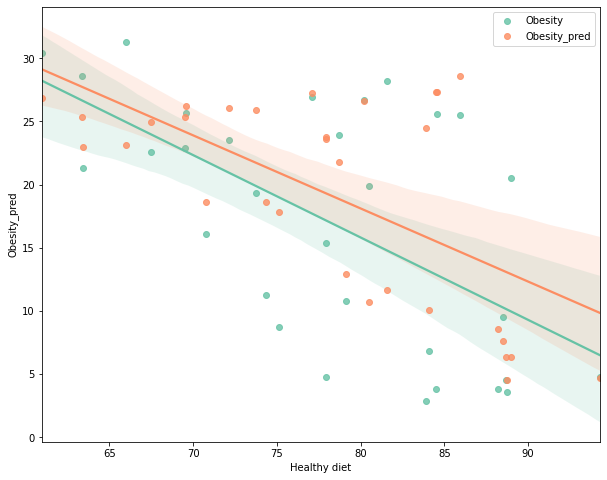

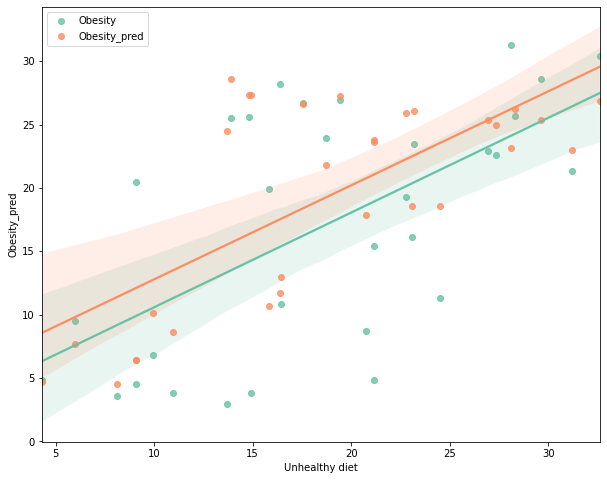

In [43]:
test_preds = model.predict(X_test)

test_plot = X_test.copy()
test_plot['Obesity'] = y_test
test_plot['Obesity_pred'] = test_preds

plotTest('Healthy diet', 'Obesity', test_plot)
plotTest('Unhealthy diet', 'Obesity', test_plot)

# 4 Observation and Conclusions

Based on all the analysis results above, we can simply generalize the main <b>observations</b>:  
- Yemen's CRF (19.22%) is an obvious outlier.
- Association between Food diet and COVID-19 shows not strong (highest average correlation coefficient is around 0.18).
- High Obesity Countries (HOC) have a higher consumption of Animal fats + Animal Products + Meat (belongs to unhealthy diet) and lower consumption of Vegetables + Vegetal Products (belongs to healthy diet).  
- High Obesity Countries (HOC) have more COVID-19 deaths cases and higher Case fatality Rate (CFR).  
- Food diet and obesity can predict COVID-19 CRF well (R^2=0.985). Obesity can predict COVID-19 CRF rate well (R^2=0.999). Thus obesity might be a very important mediating variable between food diet and COVID-19.  

Therefore, it'time to come to the final <b>conclusion</b> that a healthy diet could help prevent COVID-19 only in the way that it gets people rid of obesity. In other words, people who are overweight or obeses due to an imbalanced diet may be at higher risk of illness. The potential reason could be people who eat a well-balanced diet tend to be healthier with stronger immune systems, as suggested by WHO (2021). To avoid getting ill, we suggest obses people eat a healthier diet with more Vegetables + Vegetal Products and less Animal fats + Animal Products + Meat.  

These were difficult years when COVID-19 pandemic made us pay attention to our health. The virus makes it clear that not everything in the world of health is under our control. However, my research proves that many of us are lucky enough to have a say in one important element and that is what we eat. Healthy diets play an important role in our overall health and immune systems (FAO, 2021). The food we put in our bodies directly affects the way that we feel and the way our bodies function. This is as true during an illness as it is before or after.